In [301]:
# Set up - Crawling with Beautiful soup
from bs4 import BeautifulSoup
import urllib.request  
import pandas as pd 
%matplotlib inline  
from pandas import DataFrame
import csv
import json

# Create lists of information to add in 
ranking = []
name =[]
reviewCount=[]
rating=[]
phone=[]
address=[]
district = []

# To log in into 10 websites
for yelp in range(10):
    url = f'https://www.yelp.com/search?find_desc=ice%20cream&find_loc=New%20York%2C%20NY%2010023&ns=1&start={yelp*10}'
    ourUrl = urllib.request.urlopen(url)
    soup = BeautifulSoup(ourUrl, 'html.parser')
    raw_json = soup.find_all('script', type='application/json')[1].get_text()  # Get the json file
    new_json = raw_json[4:-3] # Restructure the json file
    data_yelp = json.loads(new_json) 
    # Create a loop to get the jason data
    for i in range(10):
        try:
            result = data_yelp['searchPageProps']['searchResultsProps']['searchResults'][i+4]['searchResultBusiness'] #Get the neccessary infomration from json file through folders
        except IndexError:
            break
        
        # Adding information of each ice cream store to the list 
        else:
            ranking.append(result['ranking'])
            name.append(result['name'])
            reviewCount.append(result['reviewCount'])
            rating.append(result['rating'])
            phone.append(result['phone'])
            address.append(result['formattedAddress'])
            district.append(result['neighborhoods'])   
            
# Restructure Data
# Replace blank value for phone with NA
for a in range(len(phone)):
    if phone[a] == '':
        phone[a] = 'NA'    
# Replace blank address with NA
for b in range(len(address)):
    if address[b] == '':
        address[b] = 'NA'  

# Replace blannk district with NA
for c in range(len(district)):
    if district[c] == []:
        district[c] = ['NA']
#Convert list of list into a list only for district
new_district=[]
for m in district:
    per_district=str(m).strip('[]')
    per_district=per_district.replace('"','')
    new_district.append(per_district)
    
    
# Create data structure for data frame                       
Data = {'Name': name,
        'Ranking': ranking,
        'Phone Number': phone,
         'District': new_district,
         'Rating':rating,
         'Address':address,
         'Num.Review': reviewCount}
# Create data frame to store all the information
Yelp_Data = DataFrame(Data, columns = ['Ranking','Name','Rating','Num.Review','Phone Number','Address','District'])
Yelp_Data.to_csv('yelp_icecreamshop_jennie.csv')

Yelp_Data

,Ranking,Name,Rating,Num.Review,Phone Number,Address,District
0,1,Van Leeuwen Artisan Ice Cream,4.5,12,(917) 388-2904,1250 6th Ave,'Theater District'
1,2,Emack and Bolio’s,4.0,286,(212) 362-2747,389 Amsterdam Ave,'Upper West Side'
2,3,Van Leeuwen Ice Cream,4.5,23,(646) 368-9195,253 Columbus Ave,'Upper West Side'
3,4,Grom,4.0,594,(212) 974-3444,1796 Broadway,'Midtown West'
4,5,Ample Hills Creamery,4.5,348,(212) 582-9354,600 11th Ave,Hell's Kitchen
5,6,CoolMess,4.0,154,(212) 355-9834,137 E 62nd St,'Upper East Side'
6,7,Forty Carrots,4.0,5,NA,2085 Broadway,'Upper West Side'
7,8,Mochidoki,3.5,23,(212) 684-0991,1000 S 8th Ave,'Upper West Side'
8,9,Van Leeuwen Ice Cream Truck,3.5,118,(718) 701-1630,NA,'Upper West Side'
9,10,Van Leeuwen Ice Cream,3.5,121,(646) 952-0311,448 Amsterdam Ave,'Upper West Side'


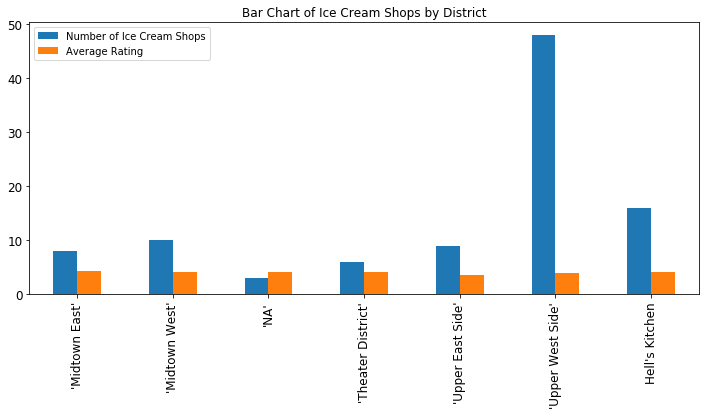

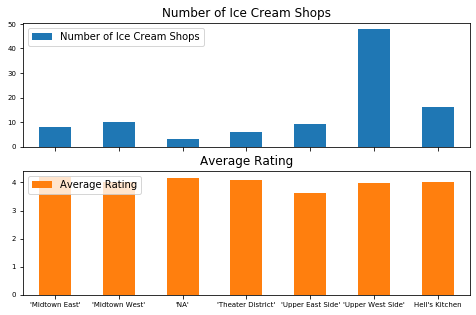

In [302]:
# Count number of stores in each district
Num_stores=Yelp_Data['District'].value_counts()
# Calculate average rating in each district
Avg_rating=Yelp_Data.groupby('District').Rating.mean()

# Create a new table for new plot contains num_stores and avg_rating
Yelp_plot = DataFrame({'Number of Ice Cream Shops':Num_stores,
                'Average Rating':Avg_rating})

# This is the new bar chart with sub bar chart
Yelp_plot.plot(title="Bar Chart of Ice Cream Shops by District",
         kind='bar',
         figsize=(12,5),
         fontsize = 12)
T=Yelp_plot.plot.bar(rot=0, figsize=(8,5), subplots = True, fontsize=7)
T[1].legend(loc=2)